<h2 style="color:brown" align="center">Implementing Batch Gradient Descent For Neural Network (or Logistic Regression)</h2>

<h4 style="color:blue">Predicting if a person would buy life insurnace based on his age using Logistic Regression</h4>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [2]:
# importing all required modules
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

__Loading dataset in colab__
<pre>
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/Folder_name/insurance_data.csv")
df.head()
</pre>

__OR__

<pre>
from google.colab import files
uploaded = files.upload()
</pre>

<pre>
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['insurance_data.csv']))
print(df.shape)
df.head()
</pre>

In [3]:
# loading the dataset
df = pd.read_csv(".\Dataset\insurance_data.csv")
print(df.shape)
df.head()

(28, 3)


,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],
                                   df.bought_insurance, test_size=0.2, random_state=25)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X_train.head()

(22, 2) (22,) (6, 2) (6,)


,age,affordibility
0,22,1
13,29,0
6,55,0
17,58,1
24,50,1


**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [5]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

X_train_scaled.head()

,age,affordibility
0,0.22,1
13,0.29,0
6,0.55,0
17,0.58,1
24,0.50,1


**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network.**

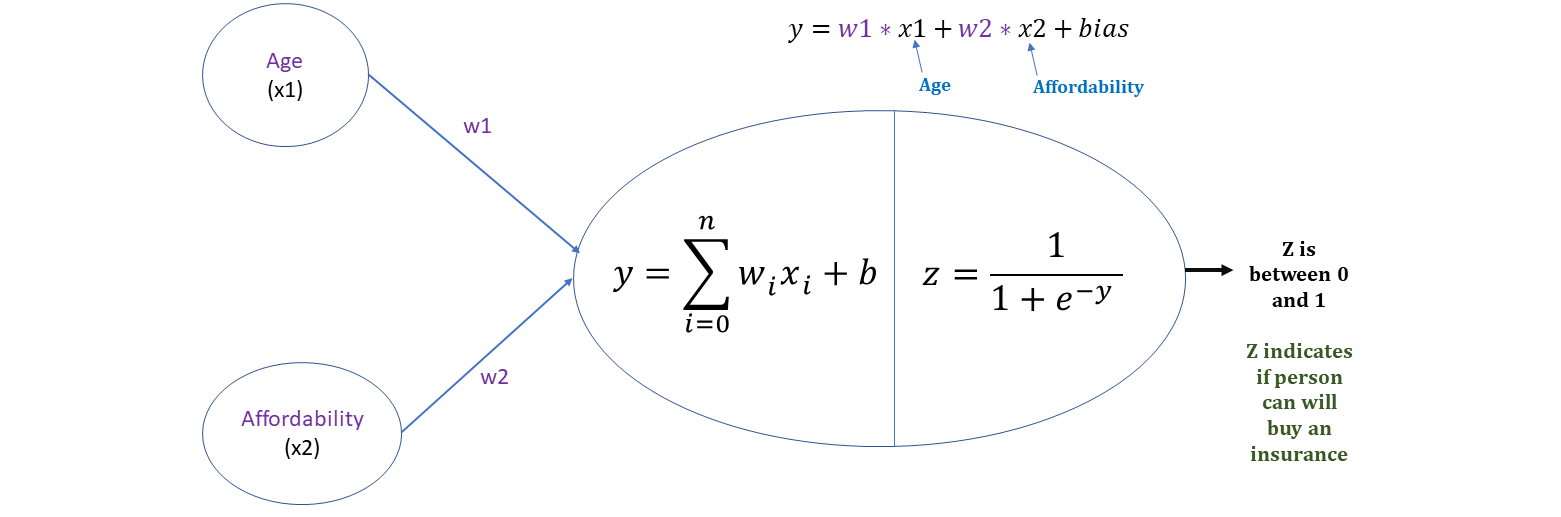

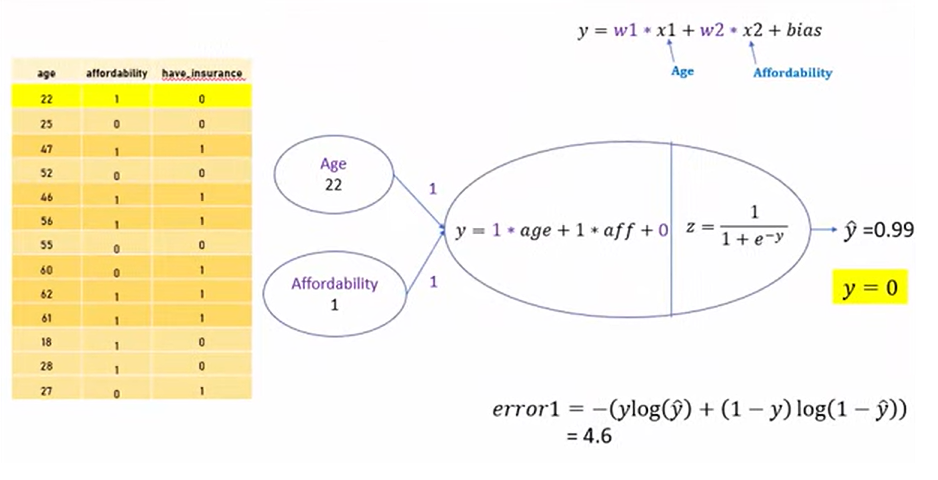

In [ ]:
# using tensor flow we shall create a simple neural network
model = keras.Sequential([
    # creating a single layer with 1 neuron and for 2 features - age, affordibility
    # initializing weights with 1s and bias with 0
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',   # binary_crossentropy is same as log loss
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)   # to train the model

Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 15ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1 [

**Evaluate the model on test set**

In [27]:
# evaluating the model
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 100ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [28]:
model.predict(X_test_scaled)    # >= 0.5 means 1 and otherwise 0

array([[0.7054848 ],
       [0.35569546],
       [0.16827846],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

In [29]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [30]:
coef, intercept = model.get_weights()

In [31]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32),
 array([-2.913703], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [32]:
# defining sigmoid activation function
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [33]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Instead of model.predict, write our own prediction function that uses w1, w2 and bias**

In [41]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept    # w1*age + w2*affordability + bias 
    return sigmoid(weighted_sum)

print (model.predict(X_test_scaled))    # >= 0.5 means 1 and otherwise 0
print (prediction_function(.47, 1))

[[0.7054848 ]
 [0.35569546]
 [0.16827846]
 [0.47801173]
 [0.7260697 ]
 [0.8294984 ]]
0.705484819775958
0.35569544317951163


In [35]:
prediction_function(.18, 1)

0.35569544317951163

**Now we start implementing gradient descent in python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [36]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [37]:
# function for log loss
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**Now it is the time to implement our final gradient descent function.**

In [38]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    # here we shall calculate final values for w1, w2 and bias
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [39]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631) 
# here 0.4631 is the last loss value in the fit operation

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.6812647787377568
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.29775789977965383, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.37150947240035115, loss:0.6431523291301916
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.4350664302689159, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.4899449005893882, loss:0.6234717079975919
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522855, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894964, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567943, w2:0.7965748796787705, bias:-0.6155315088627656, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557358, w2:0.7973647616854131, b

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [40]:
coef, intercept    # this we obtained from tensorflow

(array([[5.0608673],
        [1.4086503]], dtype=float32),
 array([-2.913703], dtype=float32))

**This shows that in the end we were able to come up with same value of w1, w2 and bias using a plain python implementation of gradient descent function**